In [ ]:
import janitor
import matplotlib.pyplot as plt
import nhanes.load # DF NHANES
import numpy as np
import pandas as pd
import session_info 
import missingno as msno # Librería para visualizar datos faltantes
import scipy.stats
import seaborn as sns

import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets 
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

## Creación DF

In [16]:
nhanes_raw_df = nhanes.load.load_NHANES_data(year = '2017-2018').clean_names(case_type = 'snake')
nhanes_raw_df

,general_health_condition,ever_breastfed_or_fed_breastmilk,age_stopped_breastfeedingdays,age_first_fed_formuladays,age_stopped_receiving_formuladays,age_started_other_foodbeverage,age_first_fed_milkdays,type_of_milk_first_fed_whole_milk,type_of_milk_first_fed2_milk,type_of_milk_first_fed1_milk,...,days_smoked_cigs_during_past30_days,avg_cigarettesday_during_past30_days,tried_to_quit_smoking,times_stopped_smoking_cigarettes,how_long_were_you_able_to_stop_smoking,unit_of_measure_dayweekmonthyear_2_smq,current_selfreported_height_inches,current_selfreported_weight_pounds,tried_to_lose_weight_in_past_year,times_lost10_lbs_or_more_to_lose_weight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never


In [17]:
columns_to_keep = [
    'total_number_of_people_in_the_family',
    'age_in_years_at_screening',
    'gender',
    'taking_insulin_now',
    'weight_kg',
    'standing_height_cm',
    'blood_mercury_total_ugl',
    'total_monounsaturated_fatty_acids_gm_dr1_tot',
    'systolic_blood_pres3_rd_rdg_mm_hg',
    'carbohydrate_gm_dr2_tot',
    'waist_circumference_cm',
    'general_health_condition'
]

In [11]:
df = nhanes_raw_df[columns_to_keep]
df

,total_number_of_people_in_the_family,age_in_years_at_screening,gender,taking_insulin_now,weight_kg,standing_height_cm,blood_mercury_total_ugl,total_monounsaturated_fatty_acids_gm_dr1_tot,systolic_blood_pres3_rd_rdg_mm_hg,carbohydrate_gm_dr2_tot,waist_circumference_cm,general_health_condition
SEQN,,,,,,,,,,,,
93703.0,5,2.0,Female,0.0,13.7,88.6,NaN,NaN,NaN,NaN,48.2,NaN
93704.0,4,2.0,Male,0.0,13.9,94.2,0.47,14.333,NaN,229.69,50.0,NaN
93705.0,1,66.0,Female,0.0,79.5,158.3,1.07,16.432,202.0,147.49,101.8,Good
93706.0,5,18.0,Male,0.0,66.3,175.7,10.64,45.805,108.0,NaN,79.3,Very good
93707.0,7 or more people in the Family,13.0,Male,0.0,45.4,158.4,0.20,33.712,128.0,153.12,64.1,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,2,70.0,Female,0.0,49.0,156.5,0.65,15.611,140.0,174.17,82.2,Very good
102953.0,1,42.0,Male,0.0,97.4,164.9,0.62,44.604,116.0,NaN,114.8,Fair or
102954.0,7 or more people in the Family,41.0,Female,0.0,69.1,162.6,2.08,23.098,114.0,208.83,86.4,Good


## Resumen Básico de Nulidad

In [18]:
df.shape

(8366, 12)

### PLOT

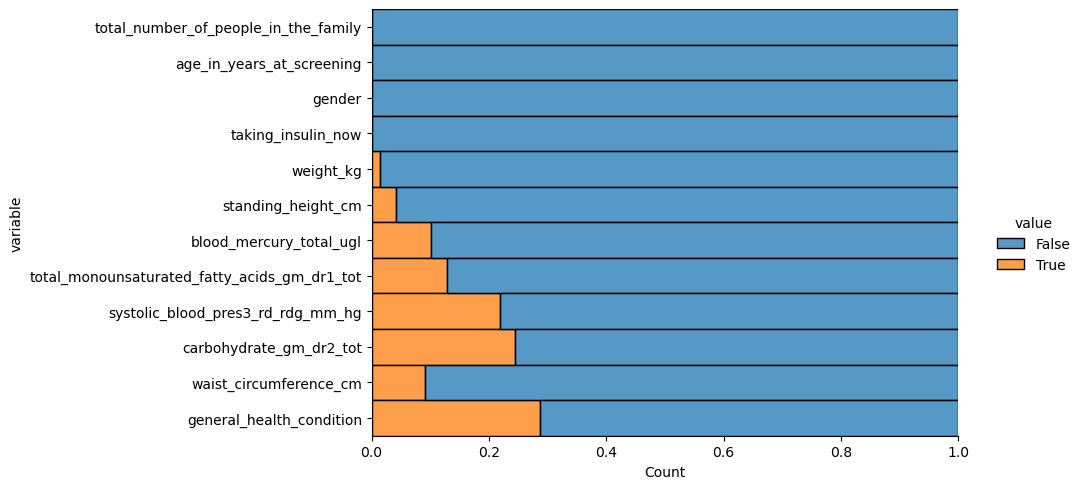

In [44]:
df.isnull().melt().pipe(lambda x: sns.displot(data = x, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

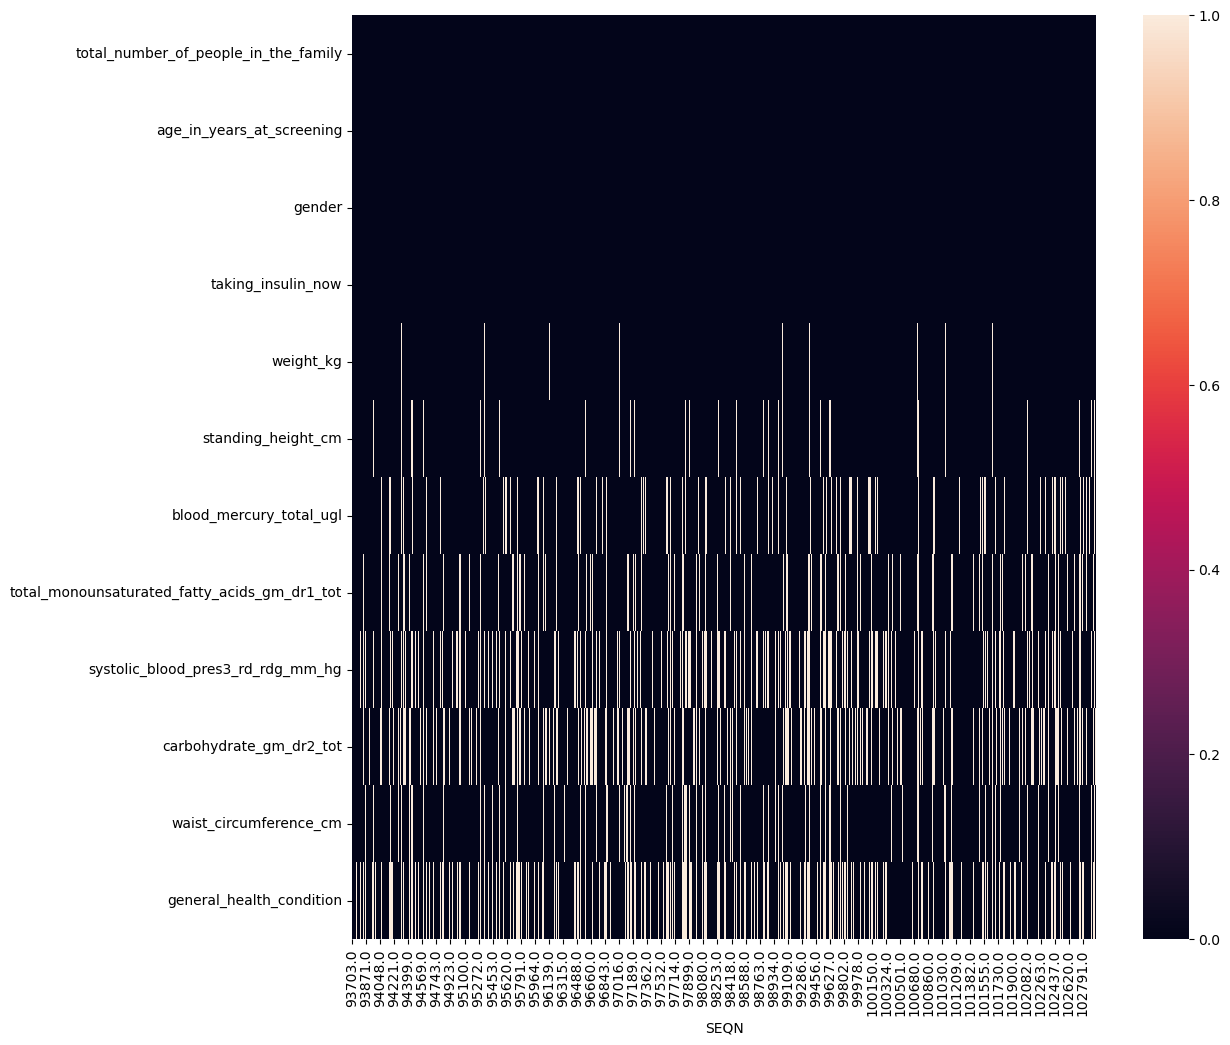

In [49]:
plt.figure(figsize=(12, 12))
df.isnull().transpose().pipe(lambda x: sns.heatmap(data = x))
plt.show()

### MSNO

<Axes: >

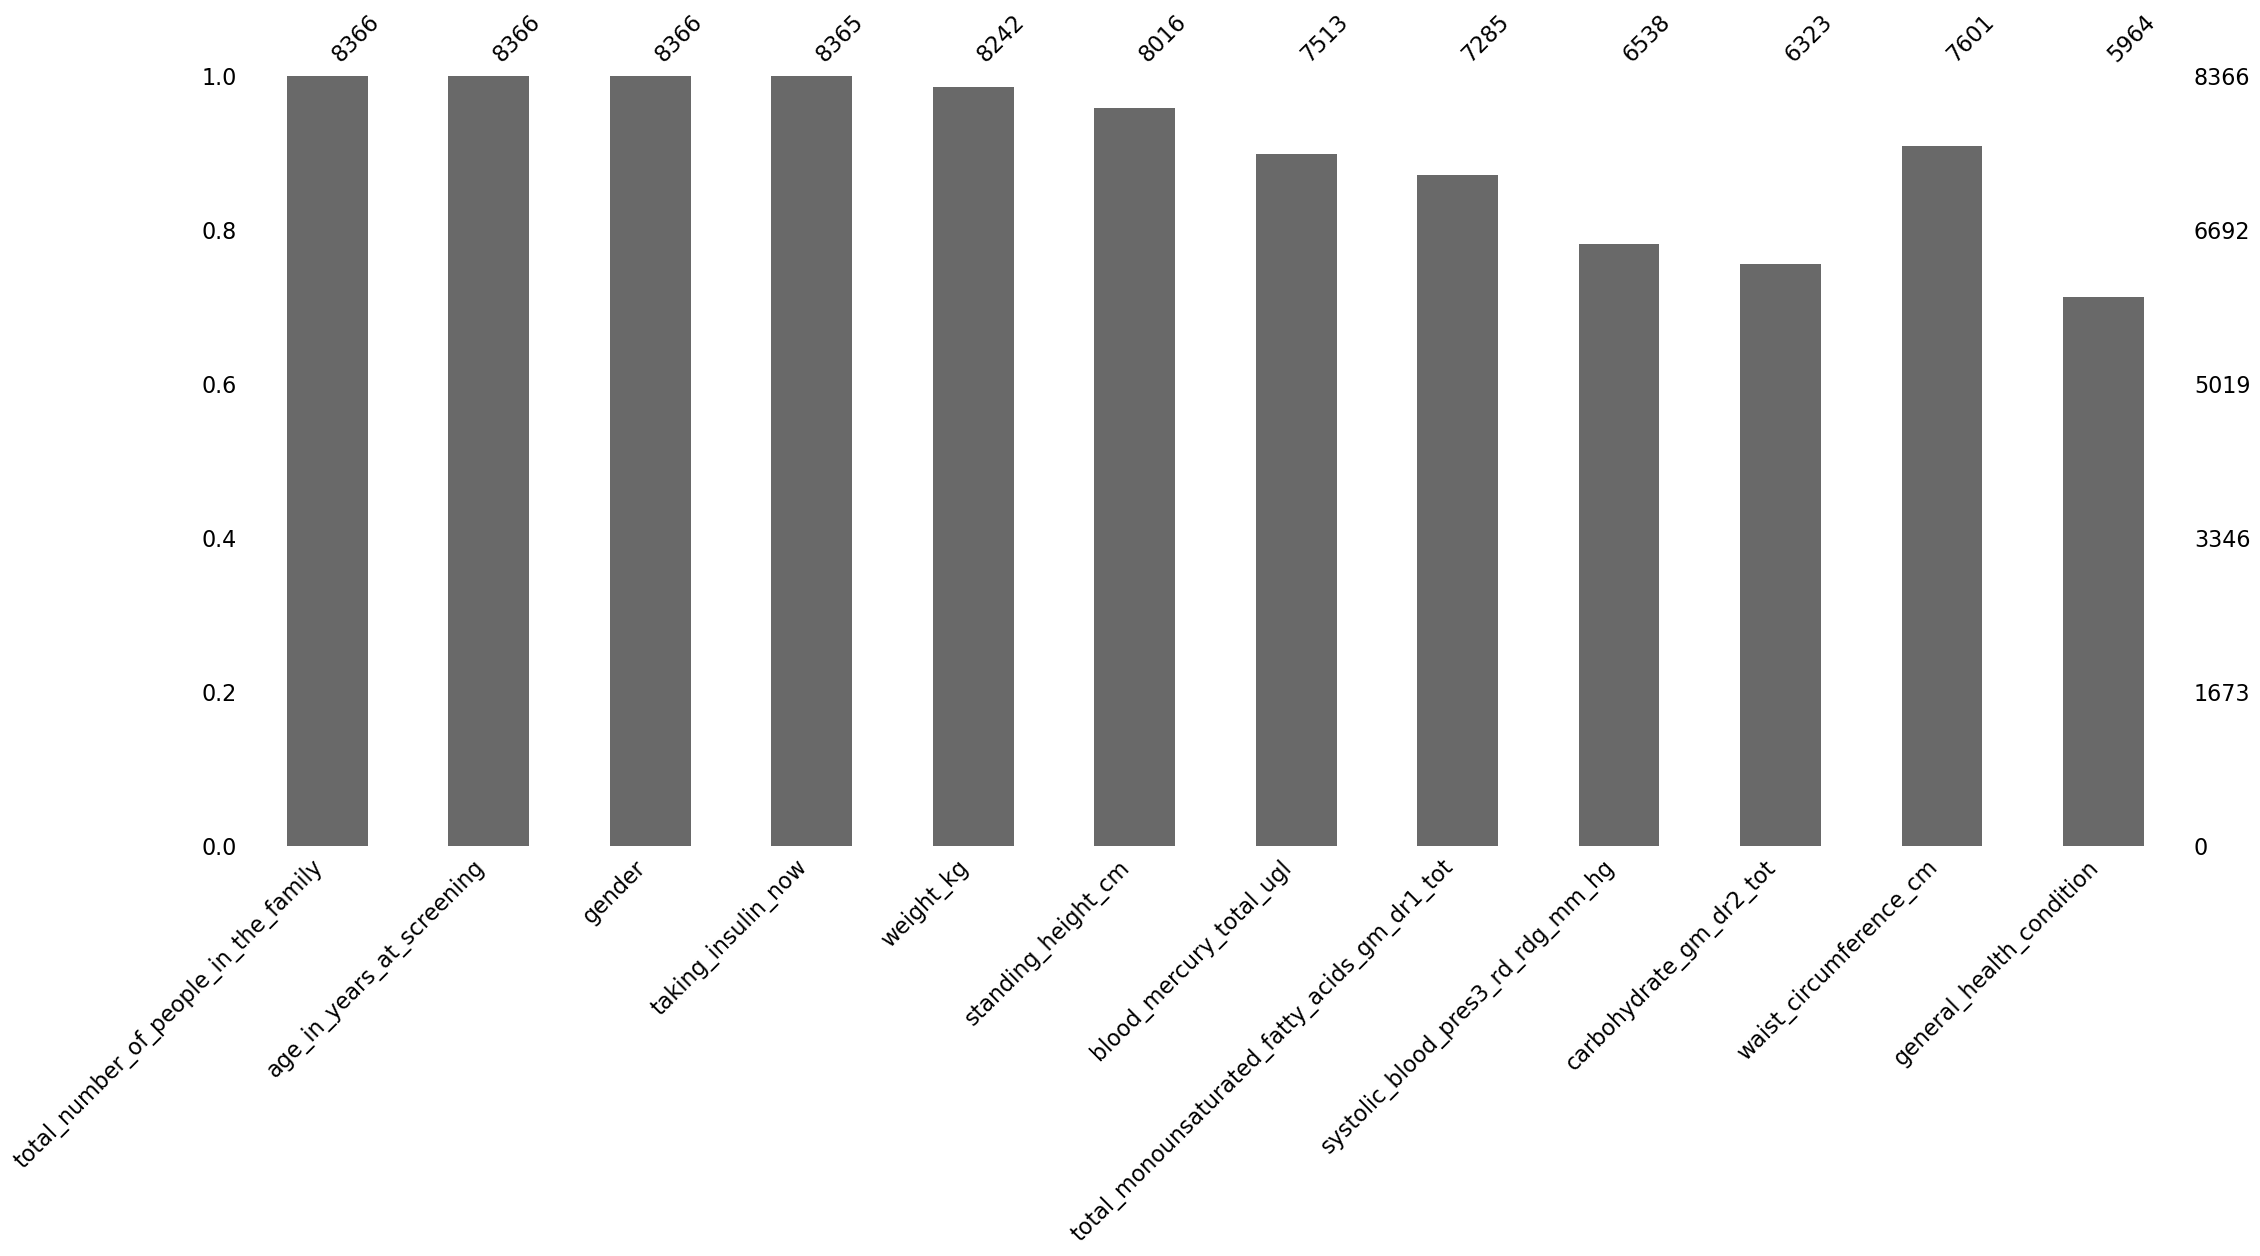

In [ ]:
# La parte que le falta a la barra representa los valores faltantes
msno.bar(df)

<Axes: >

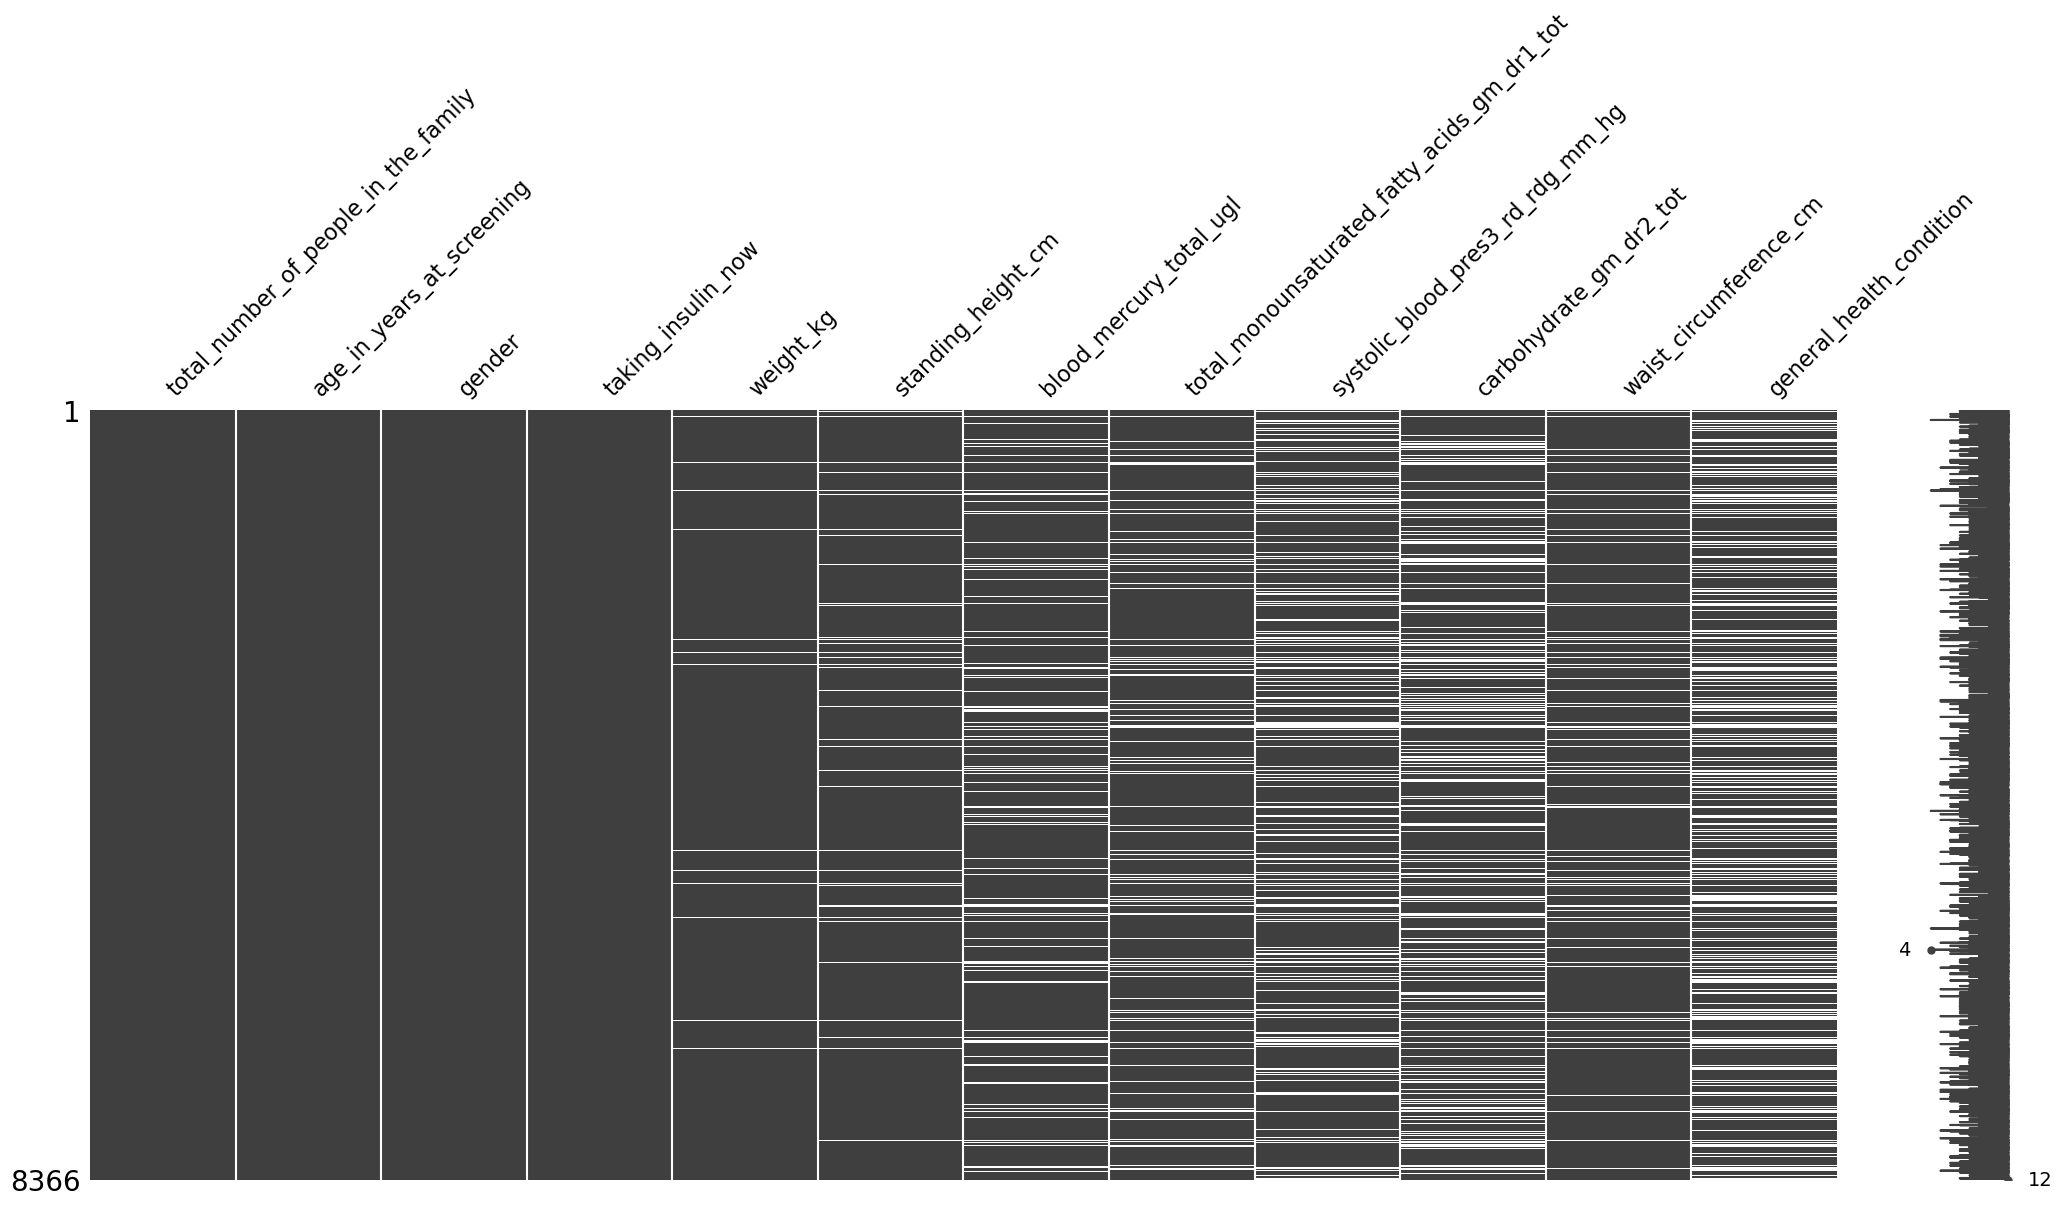

In [ ]:
msno.matrix(df)

<Axes: >

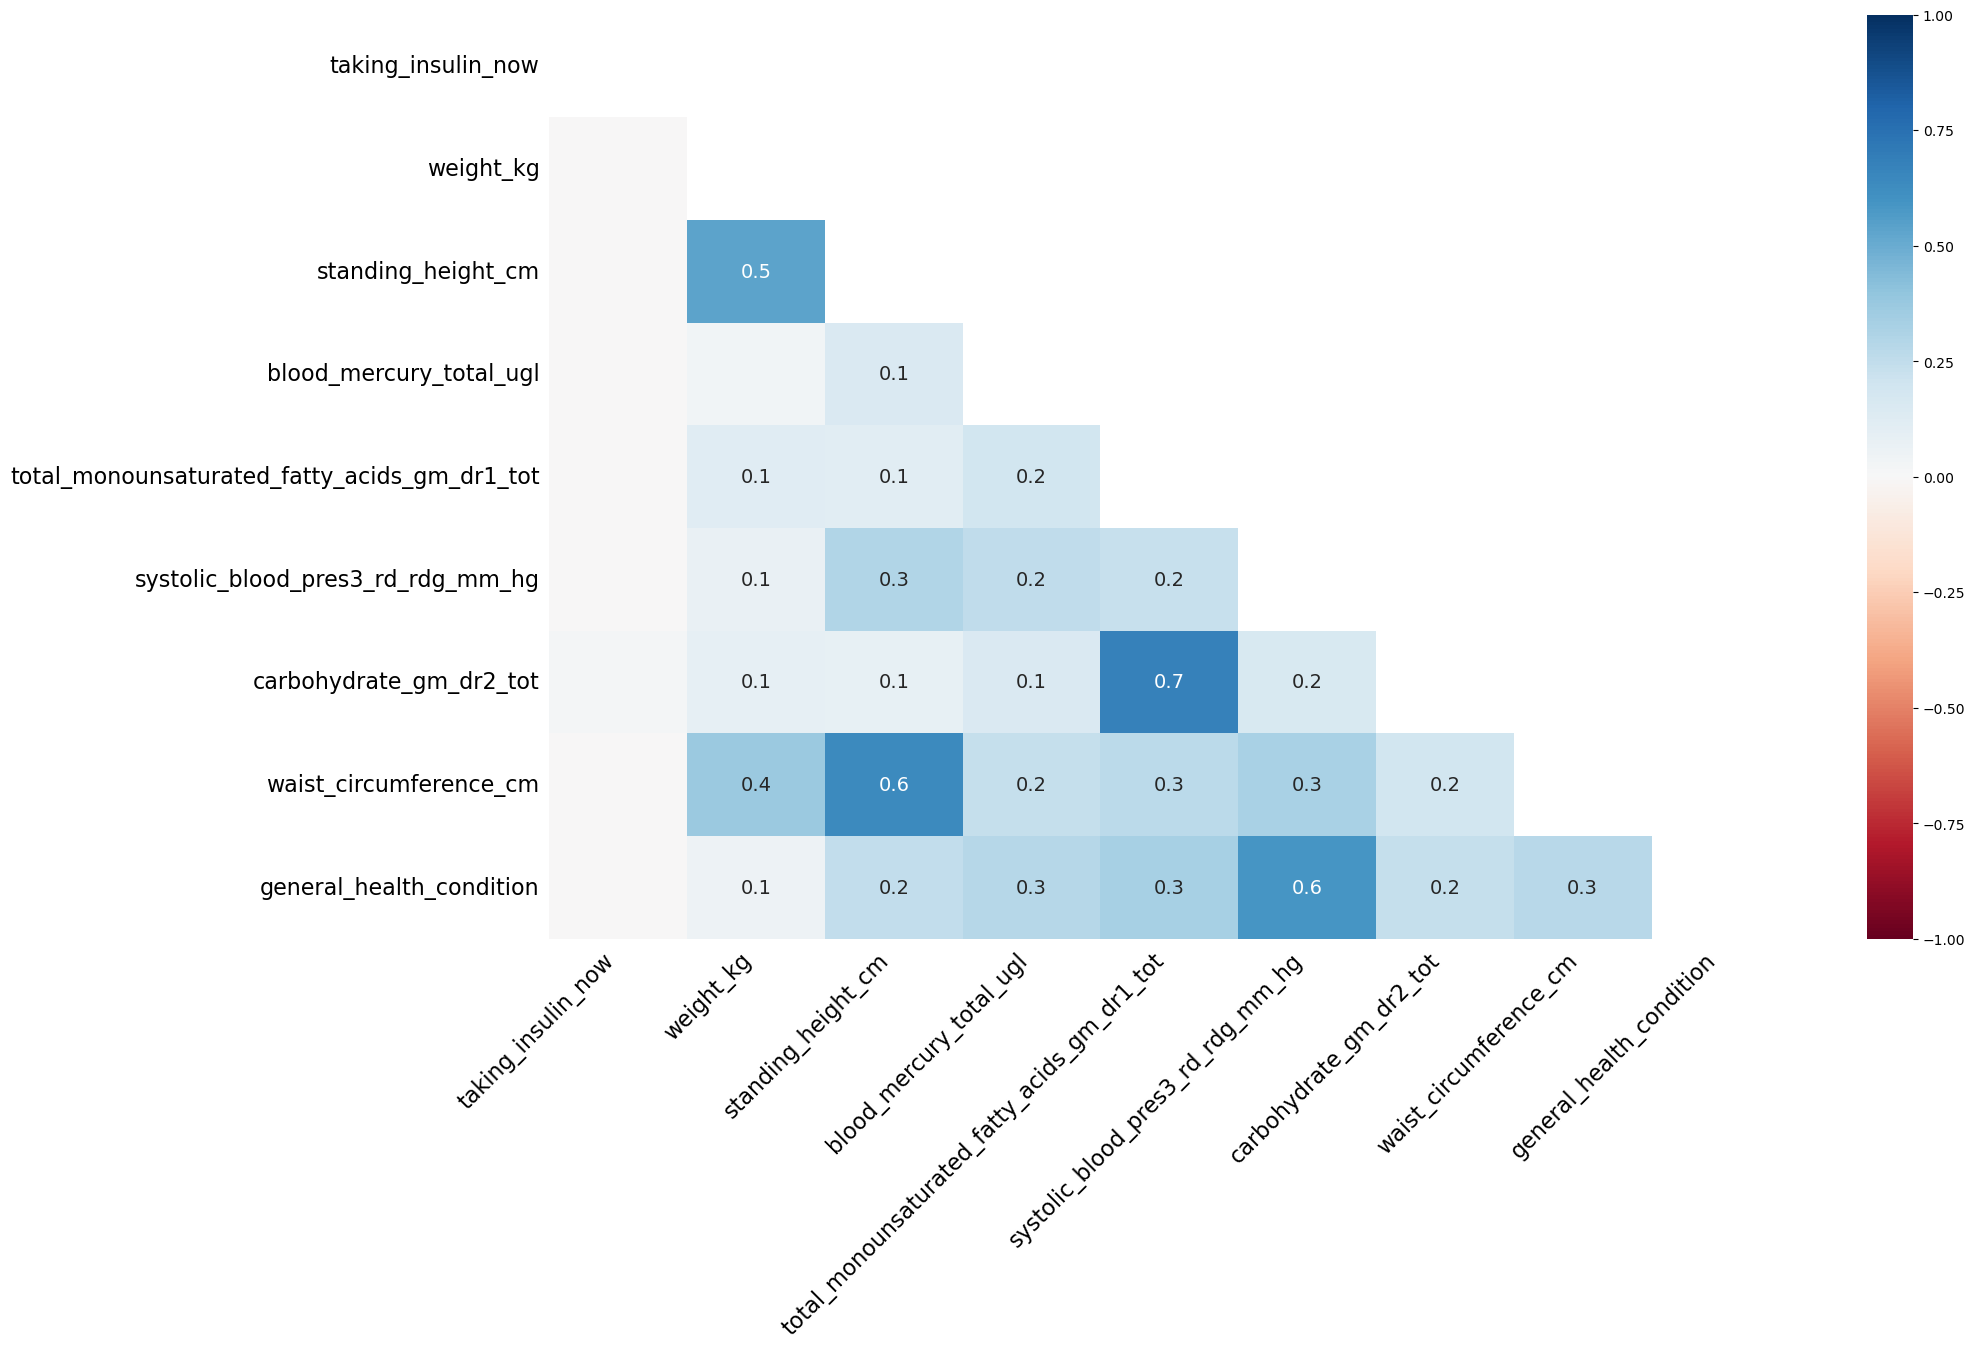

In [ ]:
# Este mapa de calor está mostrando la correlación entre las variables nulas (si son nulas al mismo tiempo o no). Representa si los individuos pueden tener ambas variables nulas al mismo tiempo
msno.heatmap(df)

## Explícito o Implícito

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8366 entries, 93703.0 to 102956.0
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   total_number_of_people_in_the_family          8366 non-null   object 
 1   age_in_years_at_screening                     8366 non-null   float64
 2   gender                                        8366 non-null   object 
 3   taking_insulin_now                            8365 non-null   float64
 4   weight_kg                                     8242 non-null   float64
 5   standing_height_cm                            8016 non-null   float64
 6   blood_mercury_total_ugl                       7513 non-null   float64
 7   total_monounsaturated_fatty_acids_gm_dr1_tot  7285 non-null   float64
 8   systolic_blood_pres3_rd_rdg_mm_hg             6538 non-null   float64
 9   carbohydrate_gm_dr2_tot                       6323 non-nul

In [ ]:
# Muestra nulos explícitos (Valores no son muy diferentes o "raros" como 999)
df.standing_height_cm.value_counts()

standing_height_cm
161.4    36
165.3    33
163.8    32
168.7    32
160.3    32
         ..
115.1     1
134.4     1
105.4     1
187.5     1
82.5      1
Name: count, Length: 1033, dtype: int64

In [ ]:
# Permite ver la distribución de categorías (Identifica categorías raras con muy pocos casos -> Posibles problemas de calidad o clases desbalanceadas)
df.general_health_condition.value_counts()

general_health_condition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [ ]:
# Detecta los valores más frecuentes (Sirve para chequear si los datos siguen valores esperados)
df.systolic_blood_pres3_rd_rdg_mm_hg.value_counts()

systolic_blood_pres3_rd_rdg_mm_hg
116.0    332
106.0    313
104.0    304
108.0    303
114.0    302
        ... 
220.0      1
222.0      1
214.0      1
238.0      1
224.0      1
Name: count, Length: 75, dtype: int64

## Imputación

In [54]:
categorical_cols = df.select_dtypes(include = ['object']).columns
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(),
                                                                   categorical_cols), remainder = 'passthrough')
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['total_number_of_people_in_the_family', 'gender',
       'general_health_condition'],
      dtype='object'))])

In [55]:
transformed_df =  pd.DataFrame(categorical_transformer.fit_transform(df), 
                                      columns = categorical_transformer.get_feature_names_out(),
                                      index = df.index).rename_columns(function = lambda x: x.removeprefix('ordinalencoder__')).rename_columns(function = lambda x: x.removeprefix('remainder__'))
transformed_df

,total_number_of_people_in_the_family,gender,general_health_condition,age_in_years_at_screening,taking_insulin_now,weight_kg,standing_height_cm,blood_mercury_total_ugl,total_monounsaturated_fatty_acids_gm_dr1_tot,systolic_blood_pres3_rd_rdg_mm_hg,carbohydrate_gm_dr2_tot,waist_circumference_cm
SEQN,,,,,,,,,,,,
93703.0,4.0,0.0,NaN,2.0,0.0,13.7,88.6,NaN,NaN,NaN,NaN,48.2
93704.0,3.0,1.0,NaN,2.0,0.0,13.9,94.2,0.47,14.333,NaN,229.69,50.0
93705.0,0.0,0.0,2.0,66.0,0.0,79.5,158.3,1.07,16.432,202.0,147.49,101.8
93706.0,4.0,1.0,4.0,18.0,0.0,66.3,175.7,10.64,45.805,108.0,NaN,79.3
93707.0,6.0,1.0,2.0,13.0,0.0,45.4,158.4,0.20,33.712,128.0,153.12,64.1
...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,1.0,0.0,4.0,70.0,0.0,49.0,156.5,0.65,15.611,140.0,174.17,82.2
102953.0,0.0,1.0,1.0,42.0,0.0,97.4,164.9,0.62,44.604,116.0,NaN,114.8
102954.0,6.0,0.0,2.0,41.0,0.0,69.1,162.6,2.08,23.098,114.0,208.83,86.4


## MICE

In [57]:
mice_imputer = sklearn.impute.IterativeImputer(estimator = LinearRegression(),
                                               initial_strategy= 'mean',
                                                max_iter = 10)
filtered_mice_df = pd.DataFrame(mice_imputer.fit_transform(transformed_df).round(),
                              columns = transformed_df.columns,
                              index = transformed_df.index)
filtered_mice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8366 entries, 93703.0 to 102956.0
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   total_number_of_people_in_the_family          8366 non-null   float64
 1   gender                                        8366 non-null   float64
 2   general_health_condition                      8366 non-null   float64
 3   age_in_years_at_screening                     8366 non-null   float64
 4   taking_insulin_now                            8366 non-null   float64
 5   weight_kg                                     8366 non-null   float64
 6   standing_height_cm                            8366 non-null   float64
 7   blood_mercury_total_ugl                       8366 non-null   float64
 8   total_monounsaturated_fatty_acids_gm_dr1_tot  8366 non-null   float64
 9   systolic_blood_pres3_rd_rdg_mm_hg             8366 non-nul

<Axes: >

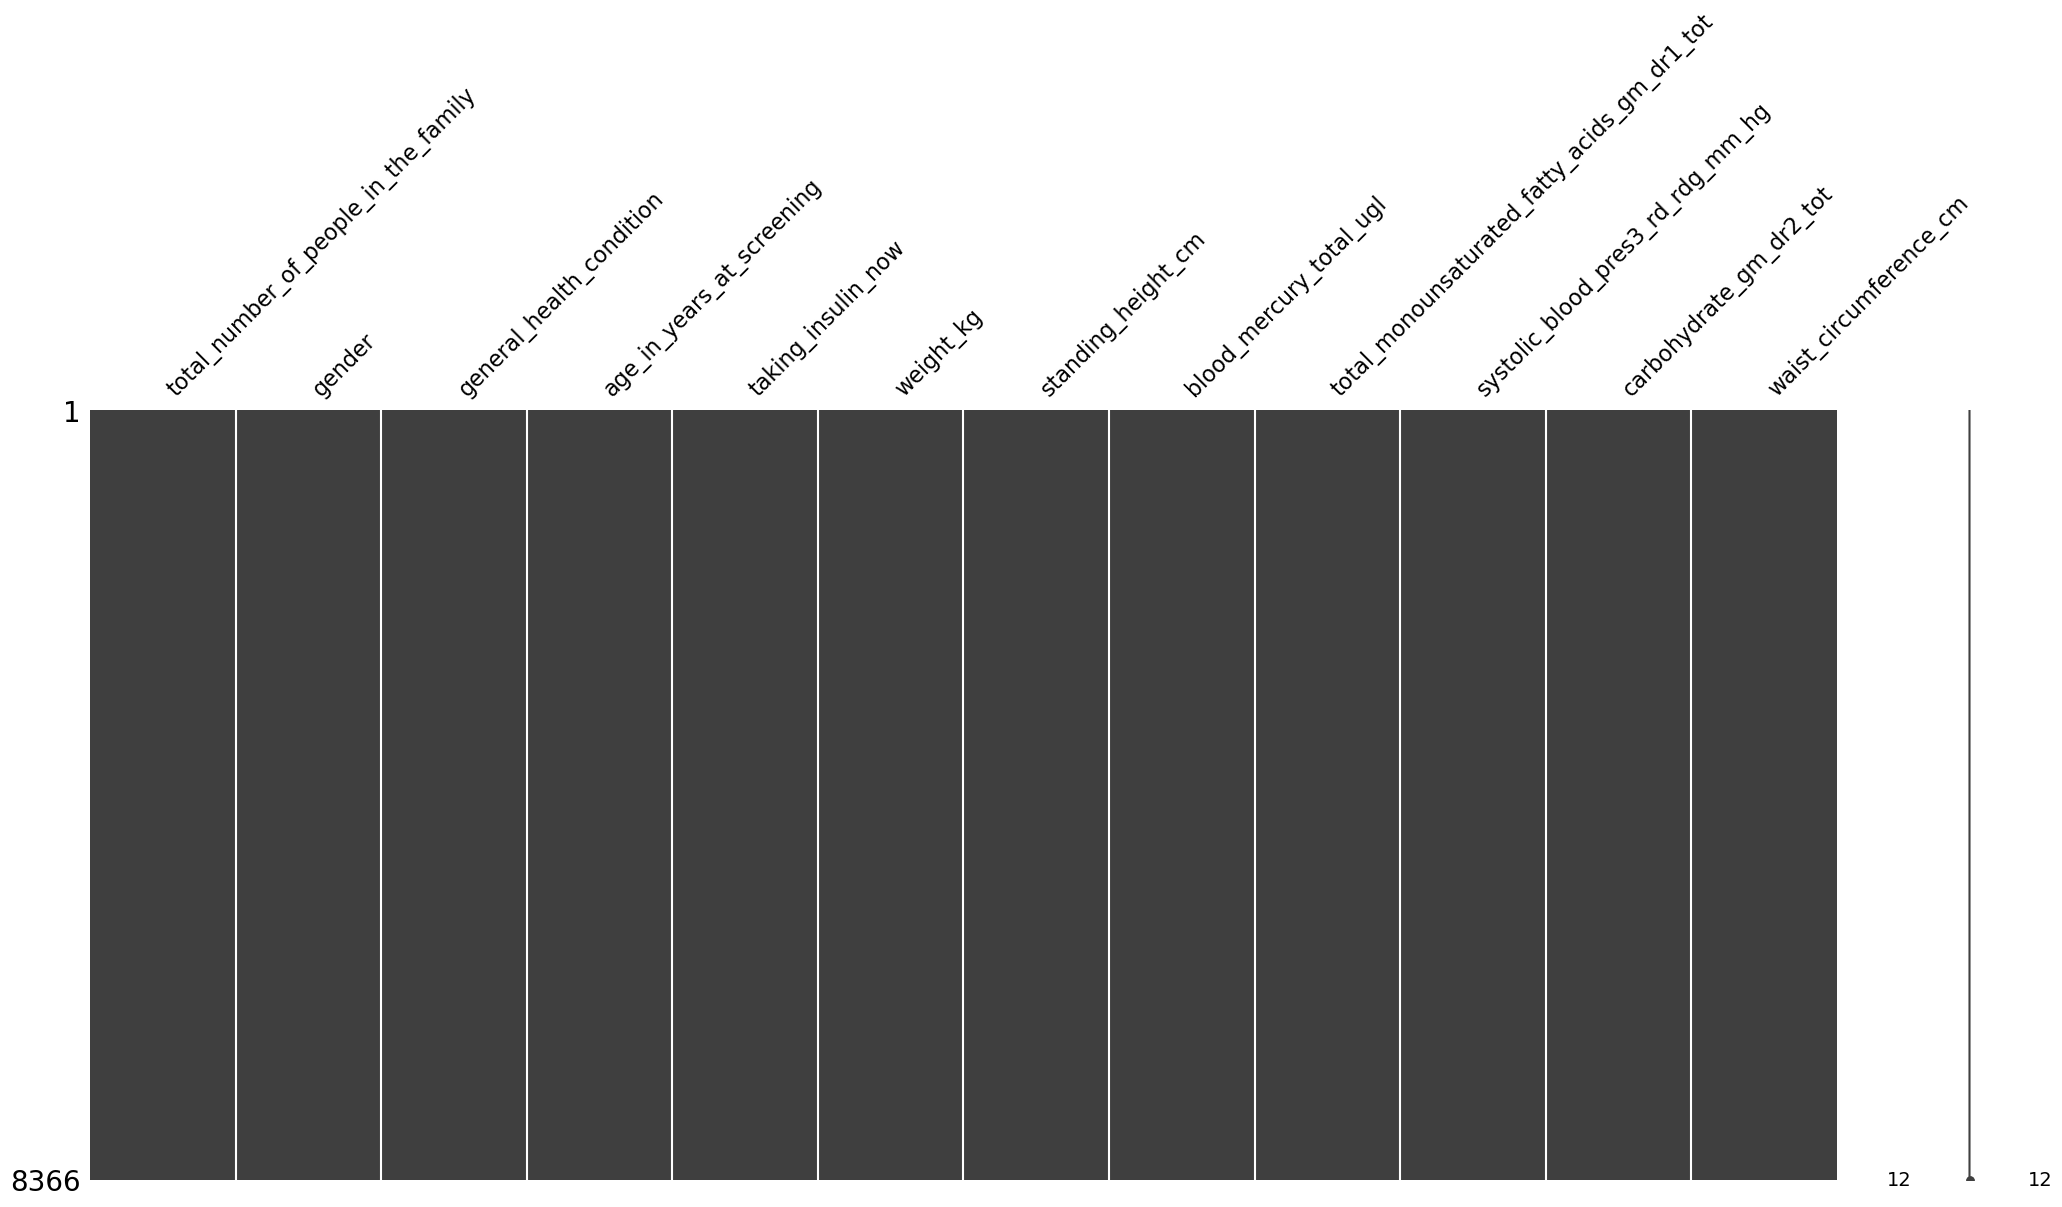

In [61]:
msno.matrix(filtered_mice_df)